In [1]:
import os

import numpy as np
import pandas as pd
from sklearn import preprocessing

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
train_transaction = pd.read_csv('train_transaction.csv', index_col='TransactionID')
test_transaction = pd.read_csv('test_transaction.csv', index_col='TransactionID')

train_identity = pd.read_csv('train_identity.csv', index_col='TransactionID')
test_identity = pd.read_csv('test_identity.csv', index_col='TransactionID')

sample_submission = pd.read_csv('sample_submission.csv', index_col='TransactionID')

train = train_transaction.merge(train_identity, how='left', left_index=True, right_index=True)
test = test_transaction.merge(test_identity, how='left', left_index=True, right_index=True)

print(train.shape)
print(test.shape)


y_train = train['isFraud'].copy()
del train_transaction, train_identity, test_transaction, test_identity

# Drop target, fill in NaNs
X_train = train.drop('isFraud', axis=1)
X_test = test.copy()

del train, test

X_train = X_train.fillna(-999)
X_test = X_test.fillna(-999)

# Label Encoding
for f in X_train.columns:
    if X_train[f].dtype=='object' or X_test[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(X_train[f].values) + list(X_test[f].values))
        X_train[f] = lbl.transform(list(X_train[f].values))
        X_test[f] = lbl.transform(list(X_test[f].values))

(590540, 433)
(506691, 432)


In [3]:
train_transaction = pd.read_csv('train_transaction.csv', index_col='TransactionID')
test_transaction = pd.read_csv('test_transaction.csv', index_col='TransactionID')

train_identity = pd.read_csv('train_identity.csv', index_col='TransactionID')
test_identity = pd.read_csv('test_identity.csv', index_col='TransactionID')

train = train_transaction.merge(train_identity, how='left', left_index=True, right_index=True)
test = test_transaction.merge(test_identity, how='left', left_index=True, right_index=True)
class_names = {0:'Not Fraud', 1:'Fraud'}
print(train.isFraud.value_counts().rename(index = class_names))

Not Fraud    569877
Fraud         20663
Name: isFraud, dtype: int64


In [4]:
non_fraud = train_transaction.loc[train['isFraud'] == 0]
fraud = train_transaction.loc[train['isFraud'] == 1]

print(len(fraud))
print(len(non_fraud))

20663
569877


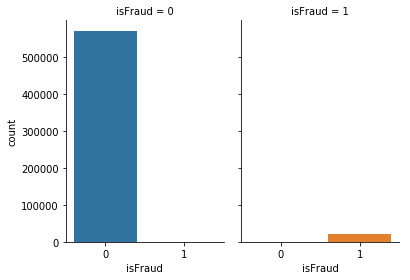

In [14]:
#sns.catplot(x="isFraud", col="isFraud", data=train_transaction, kind="count", height=4, aspect=.7);
import seaborn as sns
#sns.countplot(x='isFraud',data=train_transaction)

sns.catplot(x="isFraud", col="isFraud", data=train_transaction, kind="count", height=4, aspect=.7);

In [11]:
logistic = LogisticRegression(random_state=0, C=1e5, solver='lbfgs',multi_class='multinomial').fit(X_train, y_train)

In [12]:
logistic.score(X_train, y_train)

0.9650066041250381

In [52]:
sample_submission['isFraud'] = clf.predict_proba(X_test)[:,1]

In [53]:
sample_submission.to_csv('logistic_regression.csv')

In [54]:
!ls

Homework3.ipynb         sandbox.ipynb           train_identity.csv
logistic_regression.csv test_identity.csv       train_transaction.csv
sample_submission.csv   test_transaction.csv


In [57]:
result = pd.read_csv('logistic_regression.csv')
result

,TransactionID,isFraud
0,3663549,0.135731
1,3663550,0.151380
2,3663551,0.153893
3,3663552,0.134131
4,3663553,0.117876
5,3663554,0.125276
6,3663555,0.117031
7,3663556,0.122380
8,3663557,0.154694
9,3663558,0.107060
